In [8]:
import numpy as np
import cv2 #Importing OpenCV module.
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 


## Data preprocessing Step

#### We would be identifying the image using the face and the eyes of the person.We will consider the image if both eyes and face is detected otherwise we would discard the same.


In [12]:
#Reading an image from the directory

img= cv2.imread("/Users/aryansaini/Documents/Projects/Image Classification Project/Model/test_images/Cristiano Ronaldo _ Official Website.jpg")
#the cmd below will give 3 dimension (x,y, RGB)
img.shape




(1610, 1050, 3)

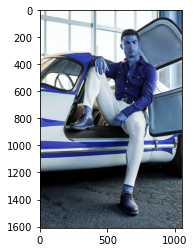

In [13]:
#Using plt from matplotlib to plot the image.
plt.imshow(img)



In [15]:
#Converting the image into a grey scaling by using the cv2 function cvtColor

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#It has removed the 3 dimension of the RGB values for the gray image.
gray.shape

(1610, 1050)

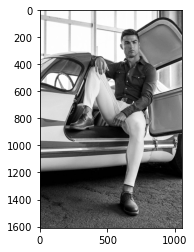

In [22]:
#Plotting the gray image using the plt and cmap function.
plt.imshow( gray, cmap='gray')


In [25]:
#Gray is an N- Dimensional Array with number ranging from 1-255
gray



array([[251, 251, 251, ...,  59,  54,  54],
       [251, 251, 251, ...,  60,  54,  54],
       [251, 251, 251, ...,  59,  54,  54],
       ...,
       [ 74,  85,  70, ...,  71,  87,  86],
       [ 69,  68,  65, ...,  86,  86,  83],
       [ 69,  68,  65, ...,  88, 135, 132]], dtype=uint8)

In [26]:
#Now we are creating face detection and eye detection object by using the Haarcascade XML file.

face_cascade = cv2.CascadeClassifier('/Users/aryansaini/Documents/Projects/Image Classification Project/Model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/aryansaini/Documents/Projects/Image Classification Project/Model/opencv/haarcascades/haarcascade_eye.xml')

#the faces object has the face of the gray image, 1.3 and 5 are some arguements not sure what they are but they 
#have been used as is everywhere i have seen the code.
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#faces returns an array [598, 185, 153, 153] 
faces

array([[598, 185, 153, 153]], dtype=int32)

In [27]:
#storing the image in x,y,w,h values which we will use later, and the face is a 2 Dimensional array
(x,y,w,h)=faces[0]
x,y,w,h

(598, 185, 153, 153)

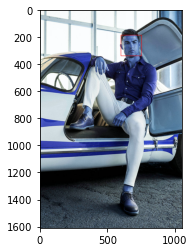

In [34]:
#Using the original image and creating a red rectangle on the face
#(255,0,0) denotes R,G,B

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)



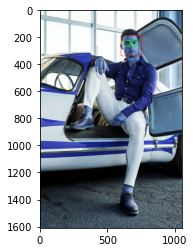

In [35]:
cv2.destroyAllWindows()
#Iterating through all the faces
for (x,y,w,h) in faces:
    #This will create a red rectangle on the face
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    #This is the face region of the image and we can plot this later on.
    #roi= region of interest
    roi_color = face_img[y:y+h, x:x+w]
    #This wil create green rectangle on the eyes of the face
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

## Now we will preprocess the cropped face of the image

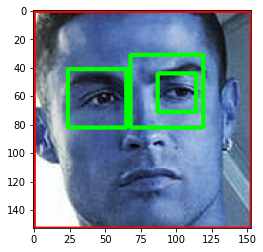

In [38]:
#plotting the cropped face, essentially the red rectangle of the face.
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

## We are only interested on the face for training the model, so we will crop each image and store it in a different folder and use the same.


## Now we will create a custom function which will check whether the image has 2 eyes or not and then crop it 


In [47]:

def get_cropped_image_if_2_eyes(image_path):
    #reading the image
    img = cv2.imread(image_path)
    #converting the image into grey
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #detecting the face and putting a red rectangle on the face region.
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        #Detecting the eyes
        eyes = eye_cascade.detectMultiScale(roi_gray)
        #Checking if there are 2 eyes or not.
        if len(eyes) >= 2:
            return roi_color
        else:
            return None 

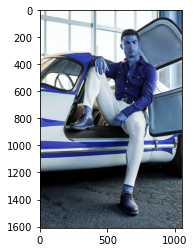

In [48]:
#Plot the original image

original_img= cv2.imread("/Users/aryansaini/Documents/Projects/Image Classification Project/Model/test_images/Cristiano Ronaldo _ Official Website.jpg")
#the cmd below will give 3 dimension (x,y, RGB)
plt.imshow(original_img)

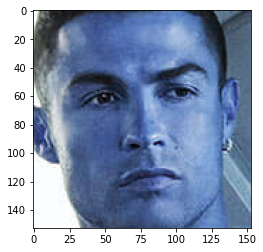

In [49]:
#Using the fuction to see what kind of image is returned by the get_cropped_image_if_2_eyes function
cropped_img= get_cropped_image_if_2_eyes("/Users/aryansaini/Documents/Projects/Image Classification Project/Model/test_images/Cristiano Ronaldo _ Official Website.jpg")
plt.imshow(cropped_img)

#We see that we are able to get the cropped face image 

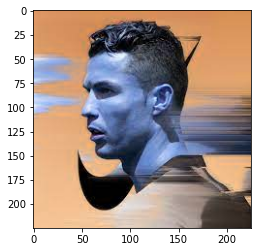

In [50]:
#Now checking if the custom function does not return a cropped image in which eyes are not distinct(less than 2)
original_img_obs= cv2.imread("/Users/aryansaini/Documents/Projects/Image Classification Project/Model/test_images/download.jpeg")
plt.imshow(original_img_obs)


In [52]:
# we see that it is not able to detect the eyes of the cropped img 
#but for some type error it is throwing an error
#will comment the code for now 
#cropped_img_obs = get_cropped_image_if_2_eyes("/Users/aryansaini/Documents/Projects/Image Classification Project/Model/test_images/download.jpeg")
#plt.imshow(cropped_img_obs)

In [ ]:
#We wrote the code to crop the original image using haarcascade and opencv 
#Now we will write the code to create a directory 
#within our Model folder "cropped image" and store those cropped images there
#We will be using the OS module to do so.

In [59]:
path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/cropped/"

In [62]:
import os
#Creating a list which will store all the sub directory name
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [67]:
img_dirs

['./Dataset/Karim_Benzema ',
 './Dataset/Mbappe',
 './Dataset/Neymar ',
 './Dataset/Lionel_Messi ',
 './Dataset/CR7',
 './Dataset/Robert_Lewandowski']

In [68]:
#Importing shutil module which deals with files 
import shutil
#Since you may run the code multiple times,
#Below if is checking if the cropped directory exist, if it does then remove it!
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
#Below is creating a cropped folder within the dataset directory        
os.mkdir(path_to_cr_data)

In [77]:
#Creating a list with the directory of cropped folder path of each of 6 players
cropped_image_dirs = []
#Creating a dictionary 
celebrity_file_names_dict = {}

#Iterating through each image directories.
for img_dir in img_dirs:
    #Initializing the count variable.
    count=1
    #fetching the football player name
    celebrity_name = img_dir.split("/")[-1]
    #print(celebrity_name), will show us the names of the football players.
    
    #Initializing the dictionary celebrity_file_names_dict with the celebrity name(key) and each key
    #is to have a list which be later used to append image paths too
    celebrity_file_names_dict[celebrity_name] = []
    
    #Now we will be iterating through all the folders of football players images, individually
    for entry in os.scandir(img_dir):
        #We will get the cropped image with red, green rectantgles.
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder= path_to_cr_data + celebrity_name
            #print(cropped_folder)
            #If the cropped_folder doesn't exist inside the cropped folder 
            if not os.path.exists(cropped_folder):
                #Create the cropped folder of each football player by iterating through their images.
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("The cropped folder is generated: ",cropped_folder)
            #Creating the roi image name to be stored in cropped folder.    
            cropped_file_name = celebrity_name + str(count) + ".png"    
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            #cv2.imwrite() method is used to save an image to any storage device
            cv2.imwrite(cropped_file_path, roi_color)
            #Appending the dictionary with the football player name (key) and their file path as value
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

The cropped folder is generated:  ./Dataset/cropped/Karim_Benzema 
The cropped folder is generated:  ./Dataset/cropped/Mbappe
The cropped folder is generated:  ./Dataset/cropped/Neymar 
The cropped folder is generated:  ./Dataset/cropped/Lionel_Messi 
The cropped folder is generated:  ./Dataset/cropped/CR7
The cropped folder is generated:  ./Dataset/cropped/Robert_Lewandowski


## Now we would be performing Wavelet Transform on each image for feature engineering  
## Each facial features would be distinguishable,In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc


## Wavelet Transform.

In [78]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

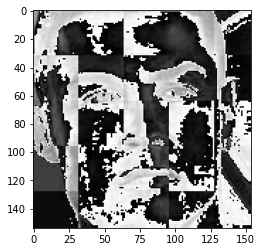

In [79]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [107]:
#Assigning class label to each celebrity name
class_dict={}
count=0

for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count=count+1
class_dict  



{'Karim_Benzema ': 0,
 'Mbappe': 1,
 'Neymar ': 2,
 'Lionel_Messi ': 3,
 'CR7': 4,
 'Robert_Lewandowski': 5}

In [116]:
X=[] #Dependent variable 
y=[] #Independent variable

for celebrity_name, training_file in celebrity_file_names_dict.items():
    for training_image in training_file:
        img = cv2.imread(training_image)
        #plt.imshow(img), ran this to see all the images however the last image was printed, check
        #maybe it can't print that many images.
        
        #We are scaling each image to a 32*32 dimension since the model needs to have a consistent dimension image.
        scalled_raw_image= cv2.resize(img,(32,32))
        #plt.imshow(scalled_raw_image)
        #getting the wavelet transformed image 
        img_har = w2d(img,"db1",5)
        #plt.imshow(img_har)
        #Scaling the wavelet transform image as well.
        scalled_img_har = cv2.resize(img_har,(32,32))
        #plt.imshow(scalled_img_har)
        
        #Now we would be vertically stacking the image using the np function vstack.
        #We are doing this so that the model can be trained using the raw image and wavelet transformed image.
        #scalled_raw_image(32*32*3,1) since the image is a RGB so *3
        combine_img = np.vstack((scalled_raw_image.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combine_img)
        #Cannot put celebrity name here since y has to be a number
        y.append(class_dict[celebrity_name])
        
      

In [125]:
#Size of each image
len(X[0])

4096

In [121]:
#Converting X into a float value 
X = np.array(X).reshape(len(X),4096).astype(float)

X.shape

(249, 4096)

In [126]:
X[0]

array([ 15.,  11.,  10., ...,   1., 114.,   0.])

## Congrats, the data cleaning part is done.
## Now we move on to training our model.

### We would be using SVM with rbf kernel tuned with heuristic finetuning

In [127]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [136]:
#Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

#Creating the model pipeline
pipe= Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
#Model is being trained 
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6825396825396826

In [137]:
#Classification report, part of the sklearn package
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       1.00      0.43      0.60         7
           2       0.41      0.70      0.52        10
           3       0.88      0.58      0.70        12
           4       0.71      0.83      0.77        12
           5       0.79      0.73      0.76        15

    accuracy                           0.68        63
   macro avg       0.75      0.67      0.68        63
weighted avg       0.75      0.68      0.69        63



## Using GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [138]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [144]:
#Creating a dictionary with the model name and their parameters to be used in GridSeach CV


model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}




In [147]:
scores =[]
best_estimators={}

import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.736558,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.478378,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.757895,{'logisticregression__C': 5}


In [148]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [152]:
best_estimators['random_forest'].score(X_test,y_test)

0.3492063492063492

In [153]:
best_estimators['svm'].score(X_test,y_test)

0.7142857142857143

In [154]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.746031746031746

In [155]:
best_classifier = best_estimators['logistic_regression']

In [160]:
#Creating a confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,best_classifier.predict(X_test))
cm

array([[ 6,  0,  0,  0,  1,  0],
       [ 0,  3,  1,  1,  1,  1],
       [ 2,  0,  5,  0,  0,  3],
       [ 0,  0,  0, 11,  0,  1],
       [ 0,  2,  0,  1,  8,  1],
       [ 0,  0,  0,  0,  1, 14]])

Text(69.0, 0.5, 'Truth')

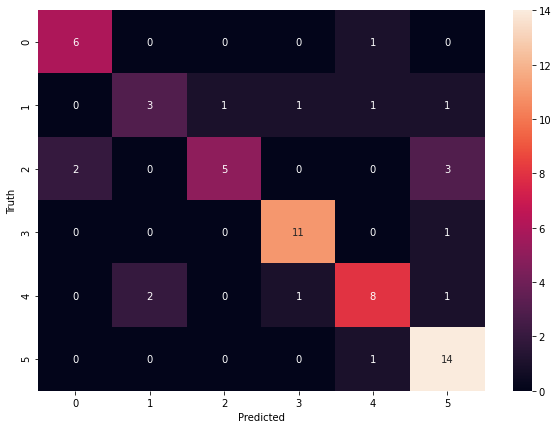

In [166]:
#Plotting the confusion matrix

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [167]:
class_dict

{'Karim_Benzema ': 0,
 'Mbappe': 1,
 'Neymar ': 2,
 'Lionel_Messi ': 3,
 'CR7': 4,
 'Robert_Lewandowski': 5}

## Saving the trained model using joblib

In [169]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_classifier, 'saved_model.pkl') 

['saved_model.pkl']

In [170]:
## Saving the class dictionary 
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))